In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr
import pymc
from pymc import utils
from pymc.database import base

import glob

#plotting functions
import matplotlib.pyplot as plt
import matplotlib as mpl

variables = ['massbal', 'precfactor', 'tempchange', 'ddfsnow']  
vn_title_dict = {'massbal':'Mass Balance',                                                                      
                 'precfactor':'Precipitation Factor',                                                              
                 'tempchange':'Temperature Bias',                                                               
                 'ddfsnow':'DDF Snow'}
vn_label_dict = {'massbal':'Mass balance\n[mwea]',                                                                      
                 'precfactor':'Precipitation factor\n[-]',                                                              
                 'tempchange':'Temperature bias\n[degC]',                                                               
                 'ddfsnow':'DDFsnow\n[mwe $degC^{-1} d^{-1}$]'}

suffix = '_15000'
mcmc_output_netcdf_fp = '../MCMC_data/netcdf' + suffix + '/'
mcmc_output_figures_fp = '../MCMC_data/figures' + suffix + '/'
mcmc_output_tables_fp = '../MCMC_data/tables/'
mcmc_output_csv_fp = '../MCMC_data/csv' + suffix + '/'
mcmc_output_hist_fp = '../MCMC_data/hist' + suffix + '/'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


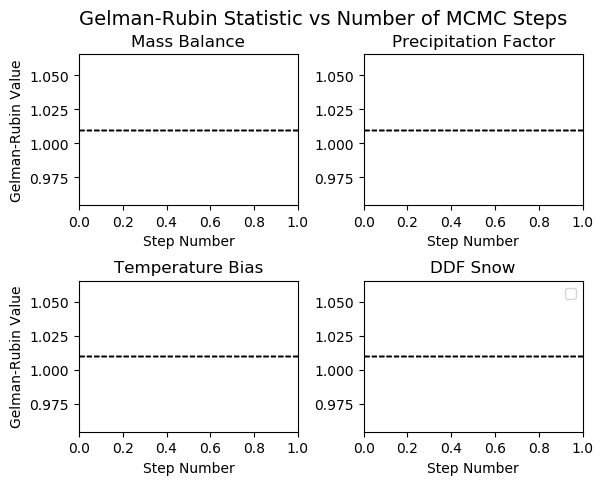

In [21]:
burns=[0, 1000, 2000]

# hard code figure sizes                                                                                            
figsize = (6.5, 5)                                                                                                
dpi = 100                                                                                                           
wspace = 0.3                                                                                                        
hspace = 0.5                                                                                                        
title = 12                                                                                                          
label = 10                                                                                                          
suptitle = 14                                                                                                       
sup_y = 0.97
nrows=2
ncols=2

v_len = len(variables)
b_len = len(burns)


# ====================== GELMAN-RUBIN PLOTS ===========================                                             
                                                                                                                        
plt.figure(figsize=figsize, dpi=dpi)                                                                                
plt.subplots_adjust(wspace=wspace, hspace=hspace)                                                                   
plt.suptitle('Gelman-Rubin Statistic vs Number of MCMC Steps',                                                      
              fontsize=suptitle, y=sup_y)                                                                            
                                                                                                                         
for v_count, vn in enumerate(variables):                                                                            
                                                                                                                        
        plt.subplot(nrows, ncols, v_count+1)                                                                                
                                                                                                                        
        for b_count, burn in enumerate(burns):                                                                                                                   
                                                                                                                                     
            # plot GR 
            # plot horizontal line for benchmark                                                                        
            plt.axhline(1.01, color='black', linestyle='--', linewidth=1)                                               
                                                                                                                         
            if v_count%2 == 0:                                                                                            
                plt.ylabel('Gelman-Rubin Value', size=label)                                                            
                                                                                                                        
            if b_count == 0:                                                                                            
                plt.title(vn_title_dict[vn], size=title)                                                                
                                                                                                                        
            if v_count == v_len-1:                                                                                      
                plt.legend()                                                                                            
                                                                                                                        
            # niceties                                                                                                  
            plt.xlabel('Step Number', size=label)
            
            plt.savefig('../../Desktop/text.png')

In [8]:
def plot_histograms_2(iters, burn, region=15, dfs=None):
    '''
    Plots histograms to assess mcmc chains for groups of glaciers.
    Puts them all in one image file.

    Plots histograms of effective_n, gelman-rubin and mc error for
    the given number of iterations and burn-in and the given variable.

    For this function to work, the appropriate csv file must have already
    been created.

    Parameters
    ----------
    iters : int
        Number of iterations associated with the Markov Chain
    burn : list of ints
        List of burn in values to plot for Gelman-Rubin stats
    region : int
        RGI region number
    dfs : list of pandas.DataFrame
        list of dataframes containing glacier information to be plotted. If
        none, looks for appropriate csv file
        
    Returns
    -------
    .png files
        Saves images to 3 png files.

    '''

    # hard code some variable names (dirty solution)
    variables = ['massbal', 'precfactor', 'tempchange', 'ddfsnow']
    vn_title_dict = {'massbal':'Mass Balance',
                     'precfactor':'Precipitation Factor',
                     'tempchange':'Temperature Bias',
                     'ddfsnow':'DDF Snow'}
    metric_title_dict = {'Gelman-Rubin':'Gelman-Rubin Statistic',
                         'MC Error': 'Monte Carlo Error',
                         'Effective N': 'Effective Sample Size'}
    metrics = ['Gelman-Rubin', 'MC Error', 'Effective N']
    
    if region in [13, 14, 15]:
        test = pd.read_csv(mcmc_output_csv_fp + 'region' +
                           str(region) + '_' + str(iters) +
                           'iterations_' + str(burn) + 'burn_' +
                           str('massbal') + '.csv')
    elif region == 'all':
        test = pd.read_csv(mcmc_output_csv_fp + 'region' +
                           str(13) + '_' + str(iters) +
                           'iterations_' + str(burn) + 'burn_' +
                           str('massbal') + '.csv')

    # determine whether Gelman-Rubin has been computed
    if 'Gelman-Rubin' in test.columns:
        metrics = ['Gelman-Rubin', 'MC Error', 'Effective N']
    else:
        metrics = ['MC Error', 'Effective N']

    # hard code font sizes
    ticks=10
    suptitle=14
    title=11
    titley = 1.05
    label=10
    plotline=2
    plotline2=1
    legend=10
    figsize=(6.5, 9)
    dpi=100
    hspace=0.6
    wspace=0.6

    # bins and ticks
    bdict = {}
    tdict = {}
    if suffix=='_trunc':
        bdict['MC Error massbal'] = np.arange(0, 2.5, 0.125)
        bdict['MC Error tempchange'] = np.arange(0, 2.5, 0.125)
        bdict['MC Error ddfsnow'] = np.arange(0, 2.5, 0.125)
        bdict['MC Error precfactor'] = np.arange(0, 2.5, 0.125)
        bdict['Gelman-Rubin massbal'] = np.arange(1, 1.002, 0.0001)
        bdict['Gelman-Rubin precfactor'] = np.arange(1.0, 1.006, 0.0003)
        bdict['Gelman-Rubin tempchange'] = np.arange(1.00, 1.02, 0.001)
        bdict['Gelman-Rubin ddfsnow'] = np.arange(1.0, 1.006, 0.0003)
        bdict['Effective N massbal'] = 20
        bdict['Effective N ddfsnow'] = np.arange(0, 2500, 125)
        bdict['Effective N tempchange'] = np.arange(0, 1000, 50)
        bdict['Effective N precfactor'] = np.arange(0, 1600, 80)
        tdict['MC Error'] = np.arange(0, 19, 4)
        tdict['Gelman-Rubin'] = np.arange(0, 30, 5)
        tdict['Effective N'] = np.arange(0, 19, 4)
    else:
        bdict['MC Error massbal'] = np.arange(0, 3, 0.15)
        bdict['MC Error tempchange'] = np.arange(0, 3, 0.15)
        bdict['MC Error ddfsnow'] = np.arange(0, 3, 0.15)
        bdict['MC Error precfactor'] = np.arange(0, 3, 0.15)
        bdict['Gelman-Rubin massbal'] = np.arange(1, 1.002, 0.0001)
        bdict['Gelman-Rubin precfactor'] = np.arange(1.0, 1.006, 0.0003)
        bdict['Gelman-Rubin tempchange'] = np.arange(1.00, 1.02, 0.001)
        bdict['Gelman-Rubin ddfsnow'] = np.arange(1.0, 1.006, 0.0003)
        bdict['Effective N massbal'] = 20
        bdict['Effective N ddfsnow'] = np.arange(0, 2500, 125)
        bdict['Effective N tempchange'] = np.arange(0, 1000, 50)
        bdict['Effective N precfactor'] = np.arange(0, 1600, 80)
        tdict['MC Error'] = np.arange(0, 19, 4)
        tdict['Gelman-Rubin'] = np.arange(0, 30, 5)
        tdict['Effective N'] = np.arange(0, 19, 4)

    # read csv files
    vn_df_dict = {}
    if region in [13, 14, 15]:
        for vn in variables:
            vn_df_dict[vn] = pd.read_csv(mcmc_output_csv_fp + 'region' +
                                         str(region) + '_' + str(iters) +
                                         'iterations_' + str(burn) + 'burn_' +
                                         str(vn) + '.csv')
    elif region == 'all':
        for vn in variables:
            regions = [13, 15]
            dfs = []
            for reg in regions:
                dfs.append(pd.read_csv(mcmc_output_csv_fp + 'region' +
                                       str(reg) + '_' + str(iters) +
                                       'iterations_' + str(burn) + 'burn_' +
                                       str(vn) + '.csv'))
            vn_df_dict[vn] = pd.concat(dfs)

    # get variables and burn length for dimension
    v_len = len(variables)
    m_len = len(metrics)

    # create figure
    fig = plt.figure(figsize=figsize, dpi=dpi)
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

    # write title
    #plt.suptitle('MC Metrics Assessment Histograms ' +
                 #str(iters) + ' iterations ' + str(burn) + ' burn-in',
                 #fontsize=suptitle, y=0.97)

    #create subplot for each metric
    for m_count, metric in enumerate(metrics):

        # create subplot for each variable
        for v_count, vn in enumerate(variables):

            df = vn_df_dict[vn]

            # plot histogram
            ax = plt.subplot(v_len, m_len, m_len*v_count+m_count+1)
            ax2 = ax.twinx()

            # compute histogram and change to percentage of glaciers
            hist, bins = np.histogram(a=df[metric], bins=bdict[metric + ' ' + vn])
            hist = hist * 100.0 / hist.sum()

            # plot histogram
            ax.bar(x=bins[1:], height=hist, width=(bins[1]-bins[0]), align='center',
                   alpha=.4, edgecolor='black', color='#0504aa')

            # create uniform bins based on metric
            ax.set_yticks(tdict[metric])

            # find cumulative percentage and plot it
            cum_hist = [hist[0:i].sum() for i in range(len(hist))]
            
            # find 5 % point or 95 % point
            if metric=='Effective N':
                percent = 5
            else:
                percent = 95
            index = 0
            for point in cum_hist:
                if point < percent:
                    index += 1

            ax2.plot(bins[:-1], cum_hist, color='#ff6600',
                     linewidth=plotline, label='Cumulative %')
            ax2.set_yticks(np.arange(0, 110, 20))
            
            ax2.plot([bins[index], bins[index]],[cum_hist[index], 0], color='black',
                     linewidth=plotline2)

            # set tick sizes
            ax.tick_params(labelsize=ticks)
            ax2.tick_params(labelsize=ticks)
            
            ax2.set_ylim(0, 100)
            #ax.set_xlim(bins[0], bins[-1])

            # niceties
            if v_count == 0:
                plt.title(metric_title_dict[metric], fontsize=title, y=titley)

            # axis labels
            if m_count == 0:
                ax.set_ylabel(vn_title_dict[vn] + '\n\n% of Glaciers', fontsize=label, labelpad=0)
            if m_count == 2:
                ax2.set_ylabel('Cumulative %', fontsize=label, rotation = 270, labelpad=10)
            if metric=='MC Error':
                ax.set_xlabel(metric + ' (% of mean)', fontsize=label)
            else:
                ax.set_xlabel(metric + ' value', fontsize=label)

            # legend
            #if v_count==3 and m_count==2:
                #ax2.legend(loc='best', fontsize=legend)

    # Save figure
    #plt.savefig(mcmc_output_hist_fp + 'region' + str(region) + '_' + str(iters) +
                #'iterations_' + str(burn) + 'burn_all.png')

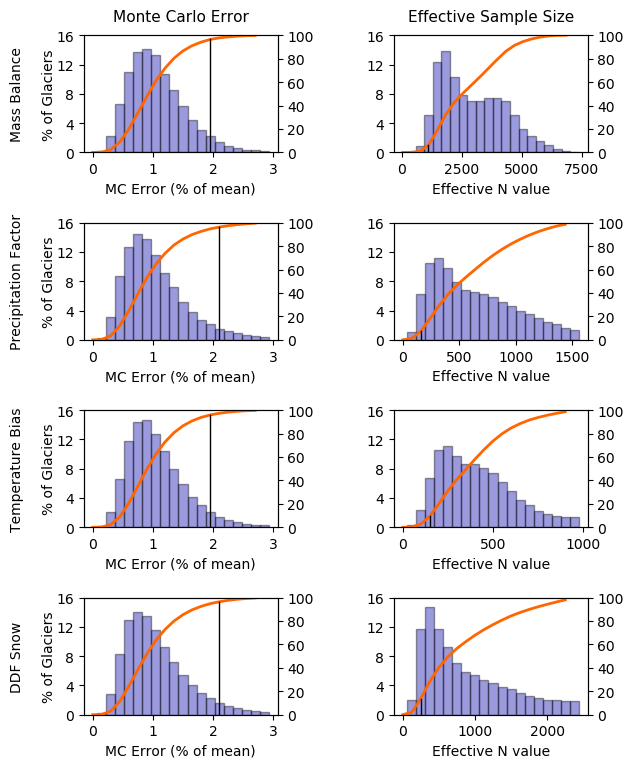

In [9]:
for iters in [15000]:
    for region in ['all']:
        plot_histograms_2(region=region, iters=iters, burn=0)

In [ ]:
tdict['MC Error massbal'] = np.arange(0, 3, 0.1)
        tdict['MC Error tempchange'] = np.arange(0, 3, 0.1)
        tdict['MC Error ddfsnow'] = np.arange(0, 3, 0.1)
        tdict['MC Error precfactor'] = np.arange(0, 3, 0.1)
        tdict['Gelman-Rubin massbal'] = np.arange(0, 30, 5)
        tdict['Gelman-Rubin precfactor'] = np.arange(0, 30, 5)
        tdict['Gelman-Rubin tempchange'] = np.arange(0, 30, 5)
        tdict['Gelman-Rubin ddfsnow'] = np.arange(0, 30, 5)
        tdict['Effective N massbal'] = np.arange(0, 19, 4)
        tdict['Effective N ddfsnow'] = np.arange(0, 19, 4)
        tdict['Effective N tempchange'] = np.arange(0, 19, 4)
        tdict['Effective N precfactor'] = np.arange(0, 19, 4)
        
        bdict['tempchange'] = np.arange(1.00, 1.06, 0.002)
        bdict['precfactor'] = np.arange(1.0, 1.006, 0.0002)
        bdict['ddfsnow'] = np.arange(1.0, 1.006, 0.0002)
        bdict['massbal'] = np.arange(1.0, 1.006, 0.0002)
        
        mcticks = np.arange(0, 19, 4)
        epbins = np.arange(0, 1200, 40)
        etbins = np.arange(0, 900, 30)
        edbins = np.arange(0, 2400, 60)
        tbins = np.arange(1.00, 1.06, 0.002)
        pbins = np.arange(1.0, 1.006, 0.0002)
        dbins = np.arange(1.0, 1.006, 0.0002)
        mbins = np.arange(1.0, 1.006, 0.0002)
        mcbins = np.arange(0, 3, 0.1)
        grticks = np.arange(0, 30, 5)
        mcticks = np.arange(0, 19, 4)
        nticks = np.arange(0, 19, 4)
        epbins = np.arange(0, 1200, 40)
        etbins = np.arange(0, 900, 30)
        edbins = np.arange(0, 2400, 60)4
        
                    '''if metric == 'Gelman-Rubin':
                ax.set_yticks(grticks)
            elif metric == 'MC Error':
                ax.set_yticks(mcticks)
            elif metric == 'Effective N':
                ax.set_yticks(nticks)'''
            
    
                '''if metric == 'Gelman-Rubin':
                if vn == 'tempchange':
                    bins = tbins
                elif vn == 'precfactor':
                    bins = pbins
                elif vn == 'ddfsnow':
                    bins = dbins
                elif vn == 'massbal':
                    bins = mbins
            elif metric == 'MC Error':
                bins = mcbins
            elif metric == 'Effective N':
                if vn == 'precfactor':
                    bins = epbins
                elif vn == 'tempchange':
                    bins = etbins
                elif vn == 'ddfsnow':
                    bins = edbins
                else:
                    bins = 30'''

In [5]:
# load netcdf data
filepath = '../MCMC_data/netcdf_trunc/'
name = '15.00621.nc'
netcdf = filepath+name

ds = xr.open_dataset(filepath + name)

ds

<xarray.Dataset>
Dimensions:   (chain: 3, iter: 30000, mp: 9)
Coordinates:
  * iter      (iter) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * mp        (mp) object 'ddfsnow' 'massbal' 'precfactor' 'tempchange' ...
  * chain     (chain) int64 0 1 2
Data variables:
    mp_value  (iter, mp, chain) float64 ...

In [13]:
np.std(ds['mp_value'].sel(chain=0, mp='ddfsnow').values)

0.0012825172881498533

In [ ]:
chain = ds['mp_value'].sel(chain=n_chain, mp=vn).values[burn:iters]

In [2]:
# load netcdf data
filepath = '../MCMC_data/netcdf'
name = '15.00621.nc'
netcdf = filepath+name
region = 15

def compare_priors():
    '''
    Compare the effects of different probabilities on
    posterior probabilities.
    
    Creates a csv file with the probability statistics for each
    glacier, and each different posterior distribution.
    '''

    df = pd.DataFrame(columns=['glac_no'])
    priors = ['trunc', 'uniform']

    for prob in priors:

        path = filepath + '_' + prob + '/'
        filelist = glob.glob(path + str(region) + '*.nc')[0:2]

        for vn in variables:

            data_dict = {}

            # create lists of each value
            glac_no = []
            mean_list = []
            stdev_list = []

            for file in filelist:

                # Open dataset
                ds = xr.open_dataset(file)


                try:

                    values = ds['mp_value'].sel(chain=0, mp=vn).values

                    # calculate values and add to list
                    mean = np.mean(values)
                    stdev = np.std(values)
                    glac_no.append(file[-11:-3]) 
                    mean_list.append(mean)
                    stdev_list.append(stdev)

                except:
                    print('Error, glacier: ', netcdf)
                    pass

                data_dict['glac_no'] = glac_no
                data_dict[prob + '_' + vn + '_' + 'mean'] = mean_list
                data_dict[prob + '_' + vn + '_' + 'stdev'] = stdev_list

            data = pd.DataFrame(data_dict)

            if not df.columns.contains('glac_no'):
                df = data
            else:
                df = pd.merge(left = df, right=data, how='outer', on='glac_no')
                
    return df


In [3]:
compare_priors()

,glac_no,trunc_massbal_mean,trunc_massbal_stdev,trunc_precfactor_mean,trunc_precfactor_stdev,trunc_tempchange_mean,trunc_tempchange_stdev,trunc_ddfsnow_mean,trunc_ddfsnow_stdev,uniform_massbal_mean,uniform_massbal_stdev,uniform_precfactor_mean,uniform_precfactor_stdev,uniform_tempchange_mean,uniform_tempchange_stdev,uniform_ddfsnow_mean,uniform_ddfsnow_stdev
0,15.02231,-0.533518,0.272726,1.065193,0.61333,-1.495348,1.429770,0.003744,0.001305,-0.525781,0.271294,1.131021,0.794054,-1.113569,1.973332,0.003513,0.001671
1,15.08821,-0.619248,0.276273,1.027405,0.60343,1.837008,1.347244,0.004008,0.001284,-0.638718,0.277204,1.160564,0.821675,2.585274,2.095105,0.003633,0.001717


In [6]:
pd.DataFrame(columns=['glac_no'])

,glac_no


In [21]:
# load netcdf data
filepath = '../MCMC_data/netcdf'
name = '15.00621.nc'
netcdf = filepath+name
region = 15
priors = ['trunc', 'uniform']

def compare_priors():
    '''
    Compare the effects of different probabilities on
    posterior probabilities.
    
    Creates a csv file with the probability statistics for each
    glacier, and each different posterior distribution.
    '''
    
    df_dict = {}

    for prob in priors:
        
        path = filepath + '_' + prob + '/'
        filelist = glob.glob(path + str(region) + '*.nc')[0:2]
    
        data_dict = {'glac_no':[]}
    
        for file in filelist:

            # Open dataset
            ds = xr.open_dataset(file)

            data_dict['glac_no'].append(file[-11:-3])
                    
            for vn in variables:
                
                values = ds['mp_value'].sel(chain=0, mp=vn).values
                
                mean = np.mean(values)
                stdev = np.std(values)
                
                if (vn + '_mean') not in data_dict:
                    data_dict[vn + '_mean'] = []
                if (vn + '_stdev') not in data_dict:
                    data_dict[vn + '_stdev'] = []
                    
                data_dict[vn + '_mean'].append(mean)
                data_dict[vn + '_stdev'].append(stdev)
                
        df = pd.DataFrame(data_dict)
        df_dict[prob] = df
    
    
    
    
    return df_dict

In [22]:
compare_priors()

{'trunc':     glac_no  massbal_mean  massbal_stdev  precfactor_mean  precfactor_stdev  \
 0  15.02231     -0.533518       0.272726         1.065193           0.61333   
 1  15.08821     -0.619248       0.276273         1.027405           0.60343   
 
    tempchange_mean  tempchange_stdev  ddfsnow_mean  ddfsnow_stdev  
 0        -1.495348          1.429770      0.003744       0.001305  
 1         1.837008          1.347244      0.004008       0.001284  ,
 'uniform':     glac_no  massbal_mean  massbal_stdev  precfactor_mean  precfactor_stdev  \
 0  15.02231     -0.525781       0.271294         1.131021          0.794054   
 1  15.08821     -0.638718       0.277204         1.160564          0.821675   
 
    tempchange_mean  tempchange_stdev  ddfsnow_mean  ddfsnow_stdev  
 0        -1.113569          1.973332      0.003513       0.001671  
 1         2.585274          2.095105      0.003633       0.001717  }

In [20]:
data_dict = {'glac_no':[]}
if 'glac_no' in data_dict:
    print('d')

d


In [2]:
def plot_priors(filepath='../MCMC_data/prior_comparison/', region='all', iters=30000, burn=0):
    '''
    Plots scatter plots of posterior distribution statistics for
    independent variables.
    '''
    priors = ['trunc', 'uniform']
    metrics = ['stdev', 'mean']
    variables = ['massbal', 'precfactor', 'tempchange', 'ddfsnow']
    vn_title_dict = {'massbal':'Mass Balance',
                     'precfactor':'Precipitation Factor',
                     'tempchange':'Temperature Bias',
                     'ddfsnow':'DDF Snow'}
    vn_label_dict = {'massbal':'Mass balance\n[mwea]',
                     'precfactor':'Precipitation factor\n[-]',
                     'tempchange':'Temperature bias\n[degC]',
                     'ddfsnow':'DDFsnow\n[mwe $degC^{-1} d^{-1}$]'}
    prior_title_dict = {'trunc':'Truncated Normal Distribution',
                        'uniform': 'Uniform Distribution'}
    metric_title_dict = {'stdev': 'Standard Deviation',
                         'mean': 'Mean Value'}
    
    prior_dict = {}

    for prior in priors:
        if region in [13, 14, 15]:
            df = pd.read_csv(filepath + 'prior' + prior + '_' + 'region' +
                             str(region) + '_' + str(iters) + 'iterations_' +
                             str(burn) + 'burn.csv')
            prior_dict[prior] = df
        elif region=='all':
            regions = [13, 14, 15]
            dfs = []
            for reg in regions:
                dfs.append(pd.read_csv(filepath + 'prior' + prior + '_' + 'region' +
                             str(reg) + '_' + str(iters) + 'iterations_' +
                             str(burn) + 'burn.csv'))
            prior_dict[prior] = pd.concat(dfs)


    # hard code font sizes
    ticks=10
    suptitle=14
    supy = 0.95
    title=12
    suby = 1.05
    label=10
    plotline=0.5
    legend=10
    figsize=(6.5, 9)
    dpi=100
    hspace=0.5
    wspace=0.4
    labelpad1=5
    labelpad2=5
    v_len = len(variables)
    p_len = len(priors)
    m_len = len(metrics)

    ticks = {}
    ticks['massbal_stdev'] = np.arange(0.1, 0.51, 0.1)
    ticks['massbal_mean'] = np.arange(-2, 2.1, 2)
    ticks['precfactor_stdev'] = np.arange(0.4, 1.1, 0.2)
    ticks['precfactor_mean'] = np.arange(0.5, 2.01, 0.5)
    ticks['tempchange_stdev'] = np.arange(1.0, 6.1, 1)
    ticks['tempchange_mean'] = np.arange(-5, 6, 5)
    ticks['ddfsnow_stdev'] = np.arange(0.0012, 0.002, 0.0003)
    ticks['ddfsnow_mean'] = np.arange(0.003, 0.0046, 0.0005)

    lims = {}
    lims['massbal_stdev'] = [0.1, 0.4]
    lims['massbal_mean'] = [-3, 3]
    lims['precfactor_stdev'] = [0.3, 0.9]
    lims['precfactor_mean'] = [0.5, 2]
    lims['tempchange_stdev'] = [0.8, 6]
    lims['tempchange_mean'] = [-9,7]
    lims['ddfsnow_stdev'] = [0.00105, 0.00185]
    lims['ddfsnow_mean'] = [0.003, 0.0045]

    # create figure
    fig = plt.figure(figsize=figsize, dpi=dpi)
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

    # write title
    #plt.suptitle('Prior Probability Comparison ' +
                 #str(iters) + ' iterations ' + str(burn) + ' burn-in',
                 #fontsize=suptitle, y=supy)

    # create subplot for each variable
    for v, vn in enumerate(variables):

        # create subplot for each variable
        for m, metric in enumerate(metrics):

            # plot histogram
            ax = plt.subplot(v_len, m_len, m_len*v+m+1)
            x = prior_dict['trunc'][vn + '_' + metric]
            y = prior_dict['uniform'][vn + '_' + metric]
            plt.scatter(x=x, y=y, marker='1')
            plt.plot([-10, 10], [-10, 10], color='black', linewidth=plotline)
            
            ylabel = 'Uniform'
            xlabel = 'Truncated Normal'
            
            if vn=='ddfsnow':
                ylabel += ' [$10^{-3}$]'
                xlabel += ' [$10^{-3}$]'

            if v == 0:
                plt.title(metric_title_dict[metric], fontsize=title, y=suby)
            if m == 0:
                ax.set_ylabel(vn_title_dict[vn] + '\n' + ylabel,
                              fontsize=label, labelpad=labelpad1)
            else:
                ax.set_ylabel(ylabel,
                              fontsize=label, labelpad=labelpad2)

            ax.set_xticks(ticks[vn + '_' + metric])
            ax.set_yticks(ticks[vn + '_' + metric])
            ax.set_ylim(lims[vn + '_' + metric])
            ax.set_xlim(lims[vn + '_' + metric])
            
            if vn=='ddfsnow':
                a = ax.get_xticks()
                b = a.copy()
                b *= 1000
                ax.set_xticks(a)
                ax.set_xticklabels(b)
                c = ax.get_yticks()
                d = c.copy()
                d *= 1000
                ax.set_yticks(c)
                ax.set_yticklabels(d)

            ax.set_xlabel(xlabel, fontsize=label)

    #plt.savefig(mcmc_prior_fp + 'scatter' + 'region' +
                #str(region) + '_' + str(iters) + 'iterations_' +
                #str(burn) + 'burn.jpg')

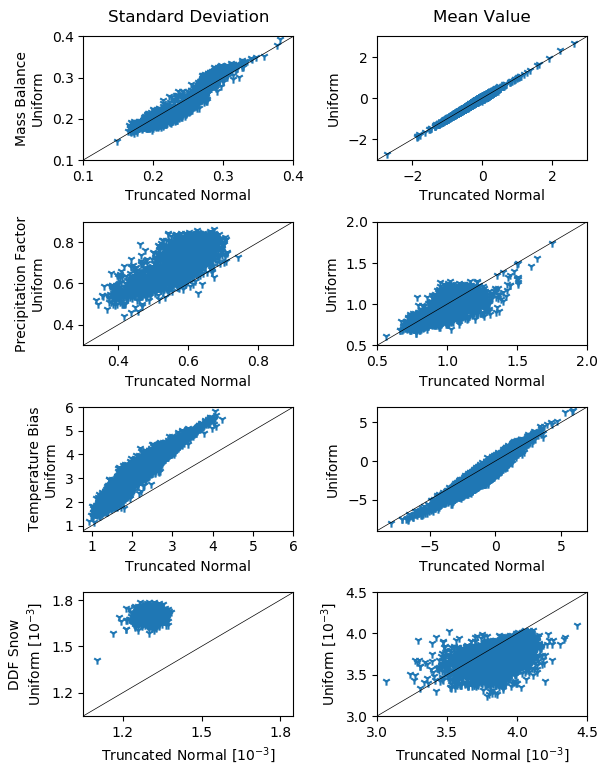

In [3]:
plot_priors()

In [51]:
prior_dict['uniform'][vn + '_' + metric]

NameError: name 'prior_dict' is not defined

In [6]:
#for vn in variables:
vn = 'massbal'
iters=15000
burn=0
dfs = []
for region in [13, 14, 15]:
    dfs.append(pd.read_csv(mcmc_output_csv_fp + 'region' +
                                 str(region) + '_' + str(iters) +
                                 'iterations_' + str(burn) + 'burn_' +
                                 str(vn) + '.csv'))
df = pd.concat(dfs)
print(df[990:1020])

      Glacier  Effective N  MC Error  Gelman-Rubin
990  13.16753         1765  1.157755      1.000395
991  13.53209         1543  1.354803      1.000865
992  13.46773         3628  0.983329      1.000492
993  13.54364         4274  0.695715      1.000030
994  13.32806         1494  0.819705      1.000538
995  13.31154         1278  1.455169      1.000191
996  13.37143         4159  0.793728      1.000232
997  13.07204         1016  1.642942      1.000185
998  13.05937         1640  1.124935      1.000041
999  13.31227         2250  0.855727      1.000237
0    14.08000         2529  1.395146      0.999974
1    14.05446         4839  0.862617      0.999949
2    14.17272         3882  0.967410      1.000255
3    14.25470         1328  1.010017      1.001130
4    14.06580         4010  0.358802      1.000178
5    14.27384         4635  0.668932      1.000172
6    14.08184         1778  1.948068      1.000020
7    14.27191         2907  1.090433      1.000790
8    14.06794         3915  0.9